# Assignment 8
A web service has periodic stop: a short one, to transfer log files and perform reporting; a longer one for maintenance.

In particular, maintenance is performed according toan $Exp_{<0.001>}$ distribution, and reporting according to an $Exp_{<0.05>}$ distribution. 

Maintenance lasts according to an $Exp_{<0.05>}$ distribution, while reporting takes an $Exp_{<1>}$ distributed time. 

Maintenance can also occur during reporting: in that case, reporting will be aborted and the system will restart to its normal state.

## Requests
- Draw a state machine based model of the system
- Implement it in a programming language of your choice
- Compute the probability of normal operation, reporting or maintenance.
- Determine the reporting frequency (how many report per hour are generated).

## Drawing of the state machine model
In the drawing, the blue ellipses are the states of the model and the blue lines are used to identify the time distributions.

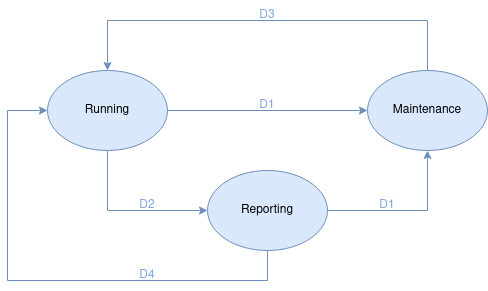

The distributions associated with each blue line are:

- *D1* :  $Exp_{<0.001>}$
- *D2* :  $Exp_{<0.05>}$
- *D3* :  $Exp_{<0.05>}$
- *D4* :  $Exp_{<1>}$

## Implementation
Below we show the implementation of the model shown above

In [2]:
from enum import Enum

class State(Enum):
    RUNNING = 1
    MAINTENANCE = 2
    REPORTING = 3

lambda_d1 = 0.001
lambda_d2 = 0.05
lambda_d3 = 0.05
lambda_d4 = 1
    
import numpy as np
rng = np.random.default_rng(seed = 0xdeadbeef)

s = State.RUNNING
t = 0
Tmax = 100000
trace = [[t,s]]

# The number of elements in each round to compute the confidence interval
Round_elems = 100
comp_reports = [0]
comp_index = 0

while t<Tmax:
    
    if s == State.RUNNING:
        da = -np.log(rng.random())/lambda_d1
        db = -np.log(rng.random())/lambda_d2
        if (da < db):
            ns = State.MAINTENANCE
        else:
            ns = State.REPORTING
        dt = min(da,db)
        
    elif s == State.REPORTING:
        da = -np.log(rng.random())/lambda_d1
        db = -np.log(rng.random())/lambda_d4
        if (da < db):
            ns = State.MAINTENANCE
            # print("interrupted reporting at time "+ str(t))
        else:
            ns = State.RUNNING
            # At this point, if the next state is RUNNING, it means a maintainance didn't happen during
            # a report, and as such the report has been completed.
            # print("completed report at time "+str(t))
            comp_reports[comp_index]+=1
        dt = min(da,db)
    else:
        dt = -np.log(rng.random())/lambda_d3
        ns = State.RUNNING

    t = t+dt
    s = ns
    trace.append([t,s])
    if(len(trace) % Round_elems == 0):
        comp_reports.append(0)
        comp_index+=1
trace=np.array(trace)

And now we show the trace we obtained and visualize it.

In [3]:
for entry in trace:
    print("time: {:.2f}\t\tstate: {}".format(entry[0],entry[1].name))

time: 0.00		state: RUNNING
time: 9.41		state: REPORTING
time: 9.50		state: RUNNING
time: 29.31		state: REPORTING
time: 29.38		state: RUNNING
time: 44.51		state: REPORTING
time: 46.04		state: RUNNING
time: 58.36		state: REPORTING
time: 59.53		state: RUNNING
time: 61.67		state: REPORTING
time: 61.94		state: RUNNING
time: 62.10		state: REPORTING
time: 63.96		state: RUNNING
time: 69.27		state: REPORTING
time: 69.38		state: RUNNING
time: 71.32		state: REPORTING
time: 71.62		state: RUNNING
time: 78.99		state: REPORTING
time: 80.35		state: RUNNING
time: 87.22		state: REPORTING
time: 87.50		state: RUNNING
time: 100.06		state: REPORTING
time: 100.25		state: RUNNING
time: 121.40		state: REPORTING
time: 121.58		state: RUNNING
time: 145.57		state: REPORTING
time: 146.30		state: RUNNING
time: 175.49		state: REPORTING
time: 175.50		state: RUNNING
time: 223.55		state: REPORTING
time: 224.62		state: RUNNING
time: 224.75		state: REPORTING
time: 225.73		state: RUNNING
time: 248.46		state: REPORTING
time

time: 22222.25		state: RUNNING
time: 22225.59		state: REPORTING
time: 22227.31		state: RUNNING
time: 22231.86		state: REPORTING
time: 22232.44		state: RUNNING
time: 22248.10		state: REPORTING
time: 22248.56		state: RUNNING
time: 22248.96		state: REPORTING
time: 22249.51		state: RUNNING
time: 22249.68		state: REPORTING
time: 22250.20		state: RUNNING
time: 22251.41		state: REPORTING
time: 22251.50		state: RUNNING
time: 22273.45		state: REPORTING
time: 22276.17		state: RUNNING
time: 22304.91		state: REPORTING
time: 22306.72		state: RUNNING
time: 22306.84		state: REPORTING
time: 22307.93		state: RUNNING
time: 22310.75		state: REPORTING
time: 22310.81		state: RUNNING
time: 22310.98		state: REPORTING
time: 22311.62		state: RUNNING
time: 22339.40		state: REPORTING
time: 22340.00		state: RUNNING
time: 22389.02		state: REPORTING
time: 22389.96		state: RUNNING
time: 22411.71		state: REPORTING
time: 22412.81		state: RUNNING
time: 22432.31		state: REPORTING
time: 22432.38		state: RUNNING
time: 224

time: 47147.73		state: RUNNING
time: 47162.62		state: MAINTENANCE
time: 47184.33		state: RUNNING
time: 47185.72		state: REPORTING
time: 47186.19		state: RUNNING
time: 47195.43		state: REPORTING
time: 47196.47		state: RUNNING
time: 47197.09		state: REPORTING
time: 47198.27		state: RUNNING
time: 47223.93		state: REPORTING
time: 47224.68		state: RUNNING
time: 47241.56		state: REPORTING
time: 47244.90		state: RUNNING
time: 47247.71		state: REPORTING
time: 47247.92		state: RUNNING
time: 47264.41		state: REPORTING
time: 47264.85		state: RUNNING
time: 47283.74		state: REPORTING
time: 47284.22		state: RUNNING
time: 47303.64		state: REPORTING
time: 47304.37		state: RUNNING
time: 47317.95		state: REPORTING
time: 47318.03		state: RUNNING
time: 47326.88		state: REPORTING
time: 47327.01		state: RUNNING
time: 47332.38		state: REPORTING
time: 47332.91		state: RUNNING
time: 47344.74		state: REPORTING
time: 47345.43		state: RUNNING
time: 47361.45		state: REPORTING
time: 47362.06		state: RUNNING
time: 4

time: 67272.06		state: REPORTING
time: 67274.23		state: RUNNING
time: 67294.55		state: REPORTING
time: 67295.30		state: RUNNING
time: 67305.41		state: REPORTING
time: 67308.34		state: RUNNING
time: 67317.18		state: REPORTING
time: 67318.44		state: RUNNING
time: 67328.68		state: REPORTING
time: 67329.36		state: RUNNING
time: 67343.72		state: REPORTING
time: 67344.43		state: RUNNING
time: 67366.55		state: REPORTING
time: 67367.03		state: RUNNING
time: 67418.82		state: REPORTING
time: 67419.89		state: RUNNING
time: 67422.05		state: REPORTING
time: 67422.96		state: RUNNING
time: 67488.56		state: REPORTING
time: 67488.59		state: RUNNING
time: 67540.87		state: REPORTING
time: 67541.21		state: RUNNING
time: 67553.64		state: REPORTING
time: 67553.65		state: RUNNING
time: 67578.15		state: REPORTING
time: 67578.49		state: RUNNING
time: 67582.23		state: REPORTING
time: 67582.58		state: RUNNING
time: 67605.48		state: REPORTING
time: 67606.26		state: RUNNING
time: 67628.15		state: REPORTING
time: 6

time: 89517.50		state: REPORTING
time: 89519.93		state: RUNNING
time: 89523.17		state: REPORTING
time: 89525.12		state: RUNNING
time: 89539.22		state: REPORTING
time: 89539.37		state: RUNNING
time: 89540.62		state: REPORTING
time: 89540.88		state: RUNNING
time: 89580.68		state: REPORTING
time: 89581.97		state: RUNNING
time: 89589.22		state: REPORTING
time: 89591.97		state: RUNNING
time: 89593.29		state: REPORTING
time: 89595.19		state: RUNNING
time: 89618.26		state: REPORTING
time: 89619.36		state: RUNNING
time: 89623.92		state: REPORTING
time: 89627.11		state: RUNNING
time: 89628.70		state: REPORTING
time: 89631.16		state: RUNNING
time: 89639.75		state: REPORTING
time: 89640.00		state: RUNNING
time: 89644.29		state: REPORTING
time: 89644.89		state: RUNNING
time: 89681.00		state: REPORTING
time: 89681.85		state: RUNNING
time: 89739.69		state: REPORTING
time: 89739.76		state: RUNNING
time: 89746.39		state: REPORTING
time: 89747.55		state: RUNNING
time: 89758.62		state: REPORTING
time: 8

In [4]:
%matplotlib tk
from matplotlib import pyplot as plt

x = trace[:, 0]
y = list(map(lambda i: i.name, trace[:,1]))
plt.step(x,y)

## Probabilities
We can now compute the probabilities of having the model being in a certain state (both precisely and with a 95% confidence interval, since the computation necessary to make such probabilities resembles a mean).

In [5]:
def perc_elements(state):
    prob = 0
    for c,n in zip(trace[:-1], trace[1:]):
        if(c[1] == state):
            prob+=n[0]-c[0]
    return prob/trace[-1][0]

print("The probabilities for the system to enter in each state are:\n")
for name, member in State.__members__.items():
    print("{}:\t{:%}".format(name, perc_elements(member)))

The probabilities for the system to enter in each state are:

RUNNING:	93.583177%
MAINTENANCE:	1.607927%
REPORTING:	4.808896%


## Reporting frequency
We can finally compute the reporting frequency of the system.

To compute the confidence interval of this performance index, we need to use the method seen for performance indexes that don't have a computation method that resembles a mean.

In [6]:
# here we assume the unit measure for the lambdas given by the exercise is in seconds^-1
rep_freq = sum(comp_reports)/ trace[-1][0] * 3600

# below we compute the 95% confidence interval of the report frequency given the number of rounds 
# selected above.
i=0
times_list = []
while i<len(trace):
    if i+Round_elems <= len(trace):
        times_list.append(trace[i+Round_elems-1][0]-trace[i][0])
        i+=Round_elems
    else:
        times_list.append(trace[-1][0]-trace[i][0])
        i=len(trace)

if(len(trace) % Round_elems == 0):
    mean = sum(map(lambda x: x[0]/x[1]*3600, zip(comp_reports,times_list)))/Round_elems
    var = sum(map(lambda x: pow(x[0]/x[1]*3600 - mean,2), zip(comp_reports,times_list)))/(Round_elems-1)
else:
    #in case the trace lenght is not a multiple of the elements in a round, I cut the last round because it 
    # is incomplete. This action provides a less accurate confidence interval, but a good one nonetheless
    mean = sum(map(lambda x: x[0]/x[1]*3600, zip(comp_reports[:-1],times_list[:-1])))/Round_elems
    var = sum(map(lambda x: pow(x[0]/x[1]*3600 - mean,2), zip(comp_reports[:-1],times_list[:-1])))/(Round_elems-1)

rep_freq_conf95 = (mean-1.96*np.sqrt(var/Round_elems), mean+1.96*np.sqrt(var/Round_elems))

print("The reporting frequence of the system is {:.3f} [{:.3f}, {:.3f}] reports per hour".format(rep_freq, rep_freq_conf95[0], rep_freq_conf95[1]))

The reporting frequence of the system is 172.259 [167.013, 176.996] reports per hour
